In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle

In [2]:
df_partidos = pd.read_csv('../data/df_partidos.csv', index_col=0)

In [3]:
df_partidos.head()

,season,date,country_name,home_team,away_team,home_team_goal,away_team_goal,result
0,2008/2009,2008-08-30,Spain,Valencia CF,RCD Mallorca,3,0,1
1,2008/2009,2008-08-31,Spain,CA Osasuna,Villarreal CF,1,1,0
2,2008/2009,2008-08-31,Spain,RC Deportivo de La Coruña,Real Madrid CF,2,1,1
3,2008/2009,2008-08-31,Spain,CD Numancia,FC Barcelona,1,0,1
4,2008/2009,2008-08-31,Spain,Racing Santander,Sevilla FC,1,1,0


In [4]:
# Dummies
df_dummies = pd.get_dummies(df_partidos[["home_team", "away_team"]])
df_partidos_dummies=df_partidos.join(df_dummies)

In [5]:
df_partidos_dummies.head()

,season,date,country_name,home_team,away_team,home_team_goal,away_team_goal,result,home_team_Athletic Club de Bilbao,home_team_Atlético Madrid,...,away_team_Real Sporting de Gijón,away_team_Real Valladolid,away_team_Real Zaragoza,away_team_SD Eibar,away_team_Sevilla FC,away_team_UD Almería,away_team_UD Las Palmas,away_team_Valencia CF,away_team_Villarreal CF,away_team_Xerez Club Deportivo
0,2008/2009,2008-08-30,Spain,Valencia CF,RCD Mallorca,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008/2009,2008-08-31,Spain,CA Osasuna,Villarreal CF,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2008/2009,2008-08-31,Spain,RC Deportivo de La Coruña,Real Madrid CF,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008/2009,2008-08-31,Spain,CD Numancia,FC Barcelona,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008/2009,2008-08-31,Spain,Racing Santander,Sevilla FC,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
# Ver temporadas
df_partidos_dummies['season'].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [7]:
# Ver dónde empieza la última temporada para cogerla como Test
df_partidos_dummies[df_partidos_dummies['season']=='2015/2016']

,season,date,country_name,home_team,away_team,home_team_goal,away_team_goal,result,home_team_Athletic Club de Bilbao,home_team_Atlético Madrid,...,away_team_Real Sporting de Gijón,away_team_Real Valladolid,away_team_Real Zaragoza,away_team_SD Eibar,away_team_Sevilla FC,away_team_UD Almería,away_team_UD Las Palmas,away_team_Valencia CF,away_team_Villarreal CF,away_team_Xerez Club Deportivo
2660,2015/2016,2015-08-23,Spain,Levante UD,RC Celta de Vigo,1,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2661,2015/2016,2015-08-22,Spain,Atlético Madrid,UD Las Palmas,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2662,2015/2016,2015-08-21,Spain,Málaga CF,Sevilla FC,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2663,2015/2016,2015-08-23,Spain,Athletic Club de Bilbao,FC Barcelona,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2664,2015/2016,2015-08-24,Spain,Granada CF,SD Eibar,1,3,2,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2015/2016,2015-10-25,Spain,Atlético Madrid,Valencia CF,2,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3036,2015/2016,2015-10-24,Spain,Málaga CF,RC Deportivo de La Coruña,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3037,2015/2016,2015-10-26,Spain,Athletic Club de Bilbao,Real Sporting de Gijón,3,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3038,2015/2016,2015-10-24,Spain,Granada CF,Real Betis Balompié,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Value Counts  1    0.488487
2    0.279934
0    0.231579
Name: result, dtype: float64


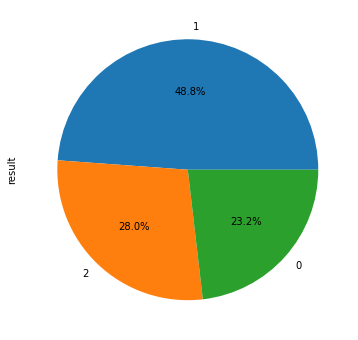

In [8]:
# Ver balance del target
print('Value Counts ', df_partidos_dummies['result'].value_counts(normalize=True))
plt.figure(figsize=(10,6))
df_partidos_dummies['result'].value_counts().plot.pie(autopct="%.1f%%");

In [9]:
# Separar en train y test
df_train = df_partidos_dummies.iloc[:2659,7:]
df_test = df_partidos_dummies.iloc[2659:,7:]

In [10]:
# Separar en X e y
X_train=df_train.drop('result', axis=1)
y_train=df_train['result']
X_test=df_test.drop('result', axis=1)
y_test=df_test['result']

In [11]:
# Shapes
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (2659, 66)
y_train shape:  (2659,)
X_test shape:  (381, 66)
y_test shape:  (381,)


In [12]:
# Entrenamiento del modelo
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy Score 0.55 
 --------------------------------------------------
Confusion Matrix 
 [[  2  71  19]
 [  5 168  11]
 [  0  67  38]] 
 --------------------------------------------------


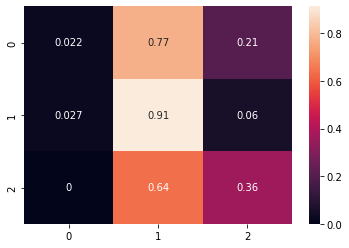

In [13]:
# Predicción
y_pred = model.predict(X_test)

print('Accuracy Score', round(accuracy_score(y_test, y_pred),2), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

In [14]:
# Guardar modelo
with open('../modelos/gbc_model', "wb") as archivo_salida:
    pickle.dump(model, archivo_salida)